# **1. Load and Explore the Data:**

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

* **Load the dataset**

In [95]:
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics (1).csv', na_values=['?', '-', 'N/A'])  # Replace specified symbols with NaN


* **Display the first 10 rows**

In [96]:
print(data.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [97]:
print("\nDescriptive statistics of the dataset:")
print(data.describe())


Descriptive statistics of the dataset:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std  

* **Check for missing values**

In [98]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

* **Instances and features**

In [100]:
num_instances = data.shape[0]
num_features = data.shape[1]
print(f"\nNumber of instances: {num_instances}")
print(f"Number of features: {num_features}")


Number of instances: 569
Number of features: 33


* **Highest variance**

* **Handle missing values**

In [104]:
print(data.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# **2. Preprocessing:**

* **Drop irrelevant columns**

In [108]:
data = data.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

* **Convert the target variable diagnosis**

In [109]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

* **Normalize features**

In [110]:
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

* **Split test**

In [111]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# **Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**

**1. Implement a KNN Classifier:**

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

* **Predict the test set**

In [113]:
y_pred = knn.predict(X_test)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9473684210526315


In [115]:
print(confusion_matrix(y_test, y_pred))


[[68  3]
 [ 3 40]]


**2. Experiment with Different Values of n_neighbors:**

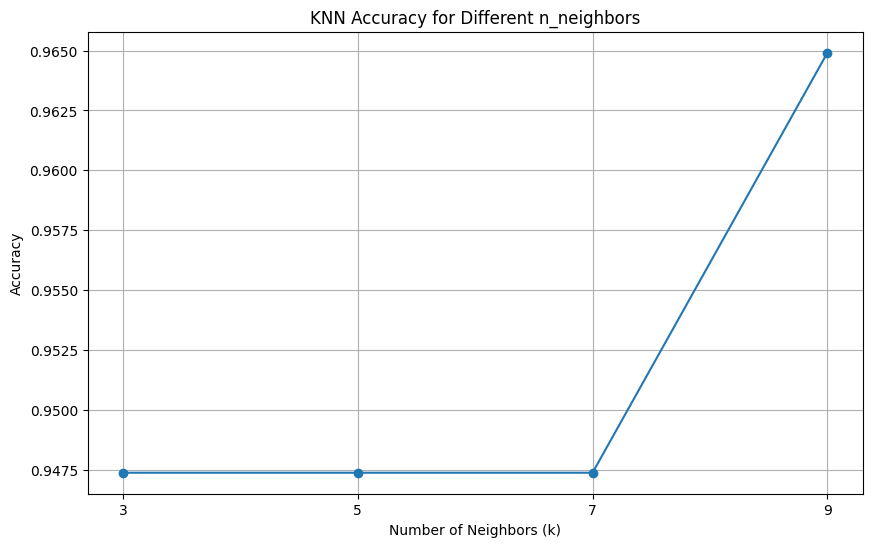

In [122]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('KNN Accuracy for Different n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

In [123]:
optimal_k = neighbors[accuracies.index(max(accuracies))]

print(f"\nNumber of n_neigbors:9")


Number of n_neigbors:9


# **Exercise 3: Implementing Logistic Regressio**

In [126]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

**Predict the test set**

In [127]:
y_pred_lr = logreg.predict(X_test)


In [128]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2. Comparison of KNN and Logistic Regression
Performance Comparison**

KNN Accuracy: Previously calculated as approximately 94.74%.

Logistic Regression Accuracy: Check the calculated value.

Precision, Recall, F1-score: Compare these metrics using the classification reports.

Discussion
Better Model: Determine which model performs better based on accuracy and F1-score.

Appropriate Model: Consider factors like interpretability, computational efficiency, and dataset characteristics to decide which model is more suitable for this classification problem.

# **Exercise 4: Hyperparameter Tuning and Cross-Validation**

**1. GridSearchCV for KNN:**


In [134]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 332, in predict_proba
    probabilities = ArgKminClassMode.co

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.9648351648351647


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.95824176 0.96043956 0.96043956        nan 0.96483516
 0.96043956 0.96043956        nan 0.95824176 0.96043956 0.96263736
        nan 0.96043956 0.95384615 0.95604396]
  warnings.warn(


**2. Cross-Validation for Logistic Regression:**

In [137]:
cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


# **Exercise 5: Decision Boundary Visualization**

In [143]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [153]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict probabilities and take the class with highest probability
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))

    # Convert string labels to numerical values for plotting
    y_numeric = [0 if val == 'B' else 1 for val in y]
    plt.scatter(X[:, 0], X[:, 1], c=y_numeric, edgecolor='k', cmap=ListedColormap(('red', 'green')))

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [154]:
knn_pca = KNeighborsClassifier(n_neighbors=9)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=9)

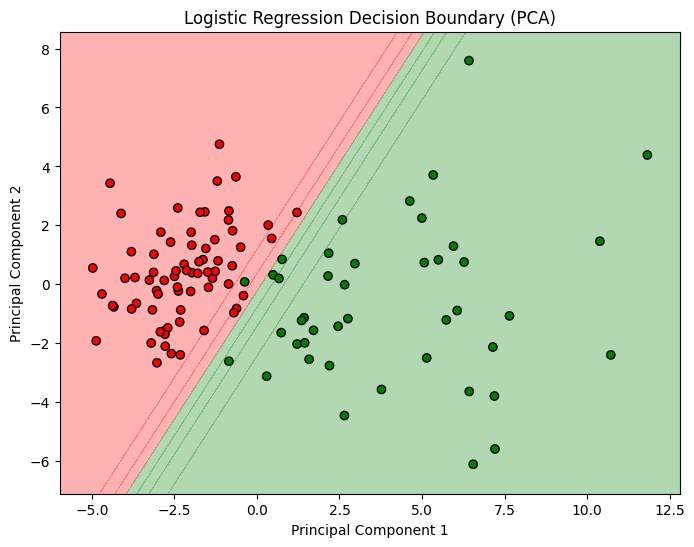

In [155]:
# Train Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=10000)
log_reg_pca.fit(X_train_pca, y_train)

# Plot decision boundary for Logistic Regression
plot_decision_boundary(log_reg_pca, X_test_pca, y_test, 'Logistic Regression Decision Boundary (PCA)')

**KNN Model:** The KNN decision boundary is flexible and adapts closely to the training data points. It can capture complex patterns but might overfit with fewer neighbors.

**Logistic Regression Model:** The decision boundary is linear and separates classes with a straight line in the PCA-reduced space. It provides a clear and interpretable separation but may not capture non-linear patterns as effectively.